In [1]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableUnCLIPImg2ImgPipeline

/mnt/c/Users/hew7/Documents/venvs/RF-demos/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Start the StableUnCLIP Image variations pipeline
pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16, variation="fp16"
)
pipe = pipe.to("cuda")
pipe.enable_model_cpu_offload()

Keyword arguments {'variation': 'fp16'} are not expected by StableUnCLIPImg2ImgPipeline and will be ignored.
Loading pipeline components...: 100%|█████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.57it/s]


In [3]:
#Get image from URL
url = "https://i.redd.it/twsliey41yk21.jpg"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")

In [4]:
#Pipe to make the variation
images = pipe(init_image).images


100%|███████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  3.54it/s]


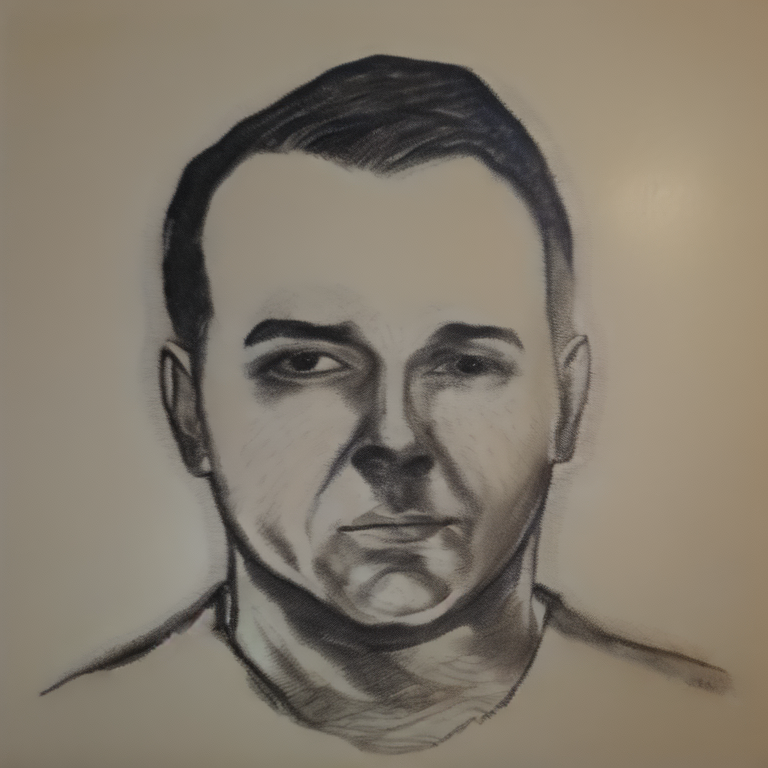

In [5]:
images[0]

In [9]:
test_inputs = pipe.feature_extractor(init_image)

In [18]:
test_embeds = pipe.image_encoder(torch.tensor(test_inputs.pixel_values[0]))

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 3 but got size 1280 for tensor number 1 in the list.

In [17]:
torch.tensor(test_inputs.pixel_values[0]).shape

torch.Size([3, 224, 224])

In [12]:
test_inputs

{'pixel_values': [array([[[ 1.2442101 ,  1.2588086 ,  1.273407  , ...,  0.5580842 ,
          0.58728105,  0.00334391],
        [ 1.2588086 ,  1.2588086 ,  1.273407  , ...,  0.54348576,
          0.58728105, -0.02585294],
        [ 1.2588086 ,  1.2588086 ,  1.2588086 , ...,  0.5726826 ,
          0.6018794 , -0.02585294],
        ...,
        [ 0.52888733,  0.49969047,  0.49969047, ..., -0.39081356,
         -0.42001042, -0.42001042],
        [ 0.54348576,  0.4558952 ,  0.44129676, ..., -0.405412  ,
         -0.43460885, -0.43460885],
        [ 0.5142889 ,  0.3975015 ,  0.32450938, ..., -0.405412  ,
         -0.49300256, -0.44920728]],

       [[ 0.9042779 ,  0.91928566,  0.93429345, ...,  0.13888167,
          0.18390508, -0.3413669 ],
        [ 0.91928566,  0.91928566,  0.93429345, ...,  0.13888167,
          0.21392061, -0.37138242],
        [ 0.91928566,  0.91928566,  0.91928566, ...,  0.15388943,
          0.19891284, -0.37138242],
        ...,
        [ 0.09385836,  0.06384283,  